In [42]:
import glob
import numpy as np 
import matplotlib.pylab as plt 
from scipy.interpolate import interp1d
from configkids import get_config

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'sans-serif','serif':['Palatino']})
figSize  = (12, 8)
fontSize = 20

In [43]:
configs = get_config()

In [44]:
# different template list which George has 
tp_l0 = np.loadtxt('templatelist/20_templates_0.list',dtype=str)
tp_l1 = np.loadtxt('templatelist/20_templates_1.list',dtype=str)
tp_l2 = np.loadtxt('templatelist/20_templates_2.list',dtype=str)
tp_base = np.loadtxt('templatelist/base_templates.list',dtype=str)
tp_pca = np.loadtxt('templatelist/PCA.list',dtype=str)

In [45]:
seds = glob.glob('sed/*.sed')

In [46]:
npca = len(tp_pca)
record_seds = list()
record_min_wave = list()
record_max_wave = list()
record_length = list()
for i in range(npca):
    sed_loaded = np.loadtxt('sed/' + tp_pca[i])
    record_seds.append(sed_loaded)
    record_length.append(sed_loaded.shape[0])
    record_min_wave.append(min(sed_loaded[:,0]))
    record_max_wave.append(max(sed_loaded[:,0]))

In [47]:
min_wave = min(record_min_wave)
max_wave = max(record_max_wave)

In [60]:
wave_grid = np.linspace(min_wave, max_wave, 100000)

In [61]:
x, y = record_seds[0][:,0], record_seds[0][:,1]
func = interp1d(x, y, fill_value='extrapolate')

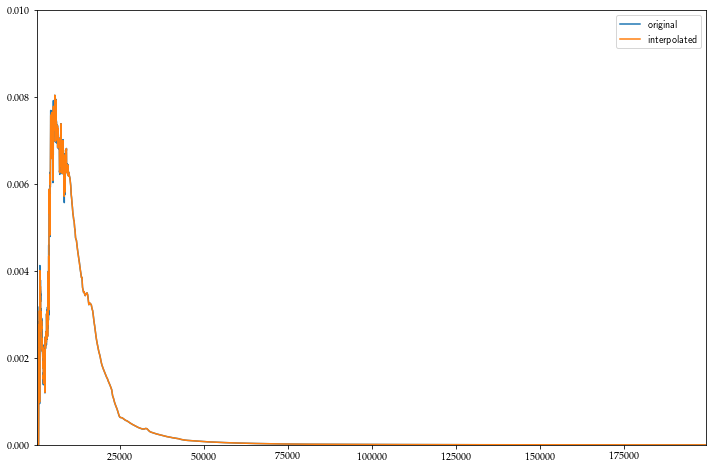

In [63]:
plt.figure(figsize = (12, 8))
plt.plot(x, y, label = 'original')
plt.plot(wave_grid, func(wave_grid), label='interpolated')
plt.ylim(0.0, 0.01)
plt.xlim(min(x), max(x))
plt.legend()
plt.show()

# Filters

In [7]:
record_filter = {}
for f in configs.filterlist:
    record_filter[f] = np.loadtxt(f'filters/{f}')

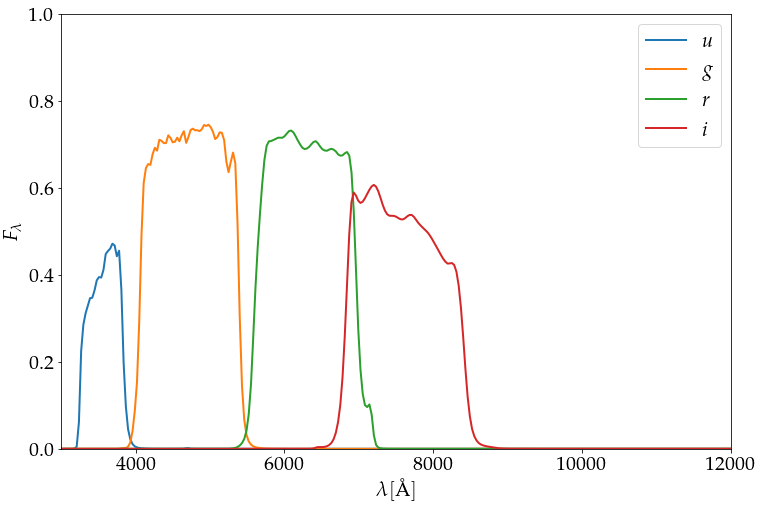

In [41]:
plt.figure(figsize=(12, 8))
for i,f in enumerate(configs.filterlist[0:4]):
    x = record_filter[f][:,0]
    y = record_filter[f][:,1]
    plt.plot(x, y, label = f'${configs.bands[i]}$', lw = 2)
plt.ylim(0.0, 1.0)
plt.xlim(2996.45, 12000)
plt.ylabel(r'$F_{\lambda}$', fontsize = fontSize)
plt.xlabel(r'$\lambda[\mathring{\textrm{A}}]$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':20})
plt.show()

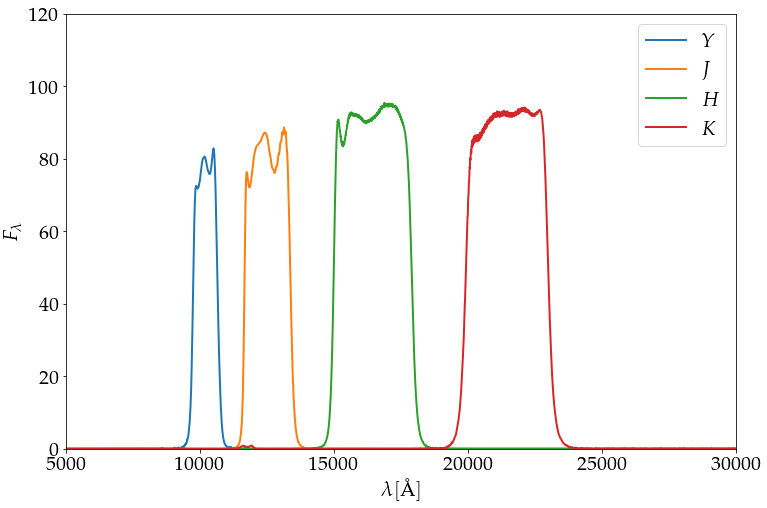

In [39]:
plt.figure(figsize=(12, 8))
for i,f in enumerate(configs.filterlist[5:]):
    x = record_filter[f][:,0]
    y = record_filter[f][:,1]
    plt.plot(x, y, label = f'${configs.bands[5+i]}$', lw = 2)
plt.ylim(0.0, 120)
plt.xlim(5000, 30000)
plt.ylabel(r'$F_{\lambda}$', fontsize = fontSize)
plt.xlabel(r'$\lambda[\mathring{\textrm{A}}]$', fontsize = fontSize)
plt.tick_params(axis='x', labelsize=fontSize)
plt.tick_params(axis='y', labelsize=fontSize)
plt.legend(loc = 'best',prop={'family':'sans-serif', 'size':20})
plt.show()